## AIM: How to detect multicollinearity in the given dataset

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
np.set_printoptions(precision=4)
pd.set_option('display.float_format',None)
warnings.filterwarnings('ignore')


In [24]:
def pretty_print_linear(coefs, names=None, sort=False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [25]:
def plot_correlation(df, numerical_feature_columns, target, k):
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm, annot=True, cmap = 'viridis')

In [26]:
def fit_ols(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()



In [27]:
 def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns != target])
    return pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])],
        index=X_var.columns)

In [28]:
def generate_x_y_numeric_target(df, target):
    numerical_feature_columns = list(df._get_numeric_data().columns)
    X = df.loc[:, df.columns != target].values
    Y = df.loc[:, df.columns == target].values
    return numerical_feature_columns, X, Y

In [29]:
df = pd.read_csv('inp_data.csv')

In [30]:

df.head()

,x1,x2,x3,y
0,100,110,40,3.9
1,95,110,40,2.6
2,90,120,30,2.7
3,85,110,40,3.0
4,80,100,20,2.4


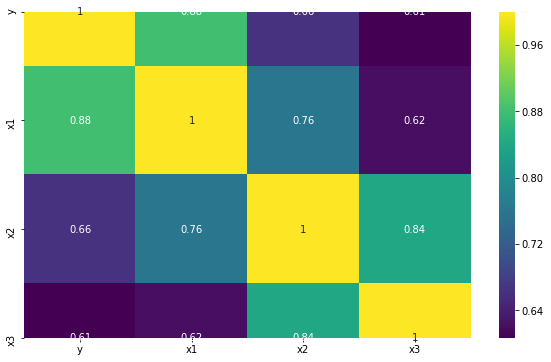

In [31]:
target = 'y'
numeric_cols, X, Y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

In [32]:
print(fit_ols(X,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                    6.72e-07
Time:                        12:04:14   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### How to assess for multicollinearity from above summary

1.Assess the coefficients. In the heatmap x1,x2,x3 have positive correlation with y. But when we look at the x2 coefficient, it is negative...we should not be the case. This indicates signs of multicollinearity in the dataset

2.R2 value indicates how good fit the model is to the dataset.High R2 value is sign of Multicollinearity

3.Prob(F statistic) value is highly significant as value is <0.05 When p value <0.05, we reject the null hypothesis. H0: the f statistic is not significant H1: It is significant

So high significance indicates signs of multicollinearity

4. Check individual p>|t| values of coefficients. We see x2, x3 are >0.05. hence we conclude p value is not significant compared to the coefficients
5. If some features are heavily collinear with any other feature, then the std error for that feature will be greater then the combined std error of those features.

In [33]:
print (generate_vif(df, target))

const    135.871560
x1         2.384174
x2         5.027931
x3         3.441157
dtype: float64


### VIF >5 indicates Multicollinearity. X2 is slightly Multicollinear